In [1]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime, timedelta

# File to Load (Remember to Change These)
path1 = "input/credit_record.csv"
path2 = "input/application_record.csv"

# Read Purchasing File and store into Pandas data frame
credit_df = pd.read_csv(path1)
application_df = pd.read_csv(path2)

application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
credit_df['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [4]:
credit_df['STATUS'] = credit_df['STATUS'].replace(['5'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['4'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['3'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['2'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['1'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['0'], 2)
credit_df['STATUS'] = credit_df['STATUS'].replace(['X'], 1)
credit_df['STATUS'] = credit_df['STATUS'].replace(['C'], 1)
credit_df['STATUS'] = credit_df['STATUS'].astype(int)

In [5]:
credit_df['STATUS'].unique()

array([1, 2, 3])

In [6]:
credit_df = credit_df.sort_values(by='STATUS', ascending=False)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
346263,5037087,-51,3
746283,5105260,-46,3
525046,5062137,-41,3
525047,5062137,-42,3
525048,5062137,-43,3


In [7]:
credit_df = credit_df.drop_duplicates(subset='ID', keep="first")
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
346263,5037087,-51,3
746283,5105260,-46,3
525046,5062137,-41,3
699287,5095348,-33,3
626752,5088020,-27,3


In [8]:
len_credit = len(credit_df.index)
len_application = len(application_df.index)

print(len_credit)
print(len_application)

unique_credit = credit_df['ID'].nunique()
unique_application = application_df['ID'].nunique()

print(unique_credit)
print(unique_application)

45985
438557
45985
438510


In [9]:
credit_card_df = pd.merge(application_df, credit_df, on='ID', how='outer')
credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-13.0,3.0
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-12.0,3.0
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-13.0,2.0
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0.0,2.0
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-24.0,1.0


In [10]:
credit_card_df['STATUS'].unique()

array([ 3.,  2.,  1., nan])

In [11]:
credit_card_df = credit_card_df[credit_card_df['STATUS'].notna()]

credit_card_df['STATUS'].unique()

len_credit_card = len(credit_card_df.index)

print(len_credit_card)

unique_credit_card = credit_card_df['ID'].nunique()

print(unique_credit_card)

45985
45985


In [12]:
credit_card_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE         float64
STATUS                 float64
dtype: object

In [13]:
credit_card_df = credit_card_df[credit_card_df['CNT_CHILDREN'].notna()]
credit_card_df = credit_card_df[credit_card_df['CNT_CHILDREN'].notna()]
credit_card_df['CNT_CHILDREN'] = credit_card_df['CNT_CHILDREN'].astype(int)
credit_card_df['AMT_INCOME_TOTAL'] = credit_card_df['AMT_INCOME_TOTAL'].astype(int)
credit_card_df['FLAG_MOBIL'] = credit_card_df['FLAG_MOBIL'].astype(int)
credit_card_df['FLAG_WORK_PHONE'] = credit_card_df['FLAG_WORK_PHONE'].astype(int)
credit_card_df['FLAG_PHONE'] = credit_card_df['FLAG_PHONE'].astype(int)
credit_card_df['FLAG_EMAIL'] = credit_card_df['FLAG_EMAIL'].astype(int)
credit_card_df['CNT_FAM_MEMBERS'] = credit_card_df['CNT_FAM_MEMBERS'].astype(int)
credit_card_df['STATUS'] = credit_card_df['STATUS'].astype(int)
credit_card_df['DAYS_BIRTH'] = credit_card_df['DAYS_BIRTH'].astype(int)
credit_card_df['DAYS_EMPLOYED'] = credit_card_df['DAYS_EMPLOYED'].astype(int)

credit_card_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int32
AMT_INCOME_TOTAL         int32
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int32
DAYS_EMPLOYED            int32
FLAG_MOBIL               int32
FLAG_WORK_PHONE          int32
FLAG_PHONE               int32
FLAG_EMAIL               int32
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int32
MONTHS_BALANCE         float64
STATUS                   int32
dtype: object

In [14]:
credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-13.0,3
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-12.0,3
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-13.0,2
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0.0,2
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-24.0,1


In [15]:
credit_card_df['DAYS_BIRTH'] = abs(credit_card_df['DAYS_BIRTH'])
credit_card_df['DAYS_EMPLOYED'] = abs(credit_card_df['DAYS_EMPLOYED'])

credit_card_df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,-13.0,3
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,-12.0,3
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2,-13.0,2
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0.0,2
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,-24.0,1


In [16]:
unique_gender = credit_card_df['CODE_GENDER'].unique()
print(unique_gender)

unique_flag_car = credit_card_df['FLAG_OWN_CAR'].unique()
print(unique_flag_car)

unique_flag_reality = credit_card_df['FLAG_OWN_REALTY'].unique()
print(unique_flag_reality)

unique_children = credit_card_df['CNT_CHILDREN'].unique()
print(unique_children)

unique_income_type = credit_card_df['NAME_INCOME_TYPE'].unique()
print(unique_income_type)

unique_education = credit_card_df['NAME_EDUCATION_TYPE'].unique()
print(unique_education)

unique_family_status = credit_card_df['NAME_FAMILY_STATUS'].unique()
print(unique_family_status)

unique_housing = credit_card_df['NAME_HOUSING_TYPE'].unique()
print(unique_housing)

unique_occupation = credit_card_df['OCCUPATION_TYPE'].unique()
print(unique_occupation)

unique_status = credit_card_df['STATUS'].unique()
print(unique_status)

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[3 2 1]


In [17]:
income_total = credit_card_df['AMT_INCOME_TOTAL'] / 1000   
    
# Determine outliers using upper and lower bounds
quartiles = income_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 103.5
Values below -33.75 could be outliers
Values above 380.25 could be outliers


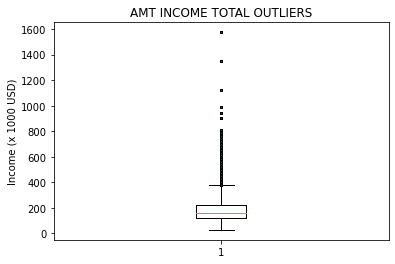

In [18]:
import matplotlib.pyplot as plt
flierprops = dict(marker='o', markerfacecolor='green', markersize=2, linestyle='none')

fig, ax = plt.subplots()
ax.set_title("AMT INCOME TOTAL OUTLIERS")
ax.set_ylabel("Income (x 1000 USD)")
ax.boxplot(income_total, flierprops=flierprops)
plt.show()

<AxesSubplot:>

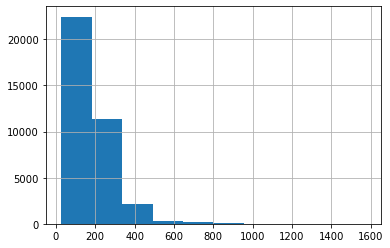

In [19]:
income_total.hist(bins=10)

In [20]:
minincome = income_total.min()
maxincome = income_total.max()

print(minincome)
print(maxincome)

27.0
1575.0


In [21]:
children_total = credit_card_df['CNT_CHILDREN']
    
# Determine outliers using upper and lower bounds
quartiles = children_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 1.0
Values below -1.5 could be outliers
Values above 2.5 could be outliers


In [22]:
family_total = credit_card_df['CNT_FAM_MEMBERS']
    
# Determine outliers using upper and lower bounds
quartiles = family_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 1.0
Values below 0.5 could be outliers
Values above 4.5 could be outliers


<AxesSubplot:>

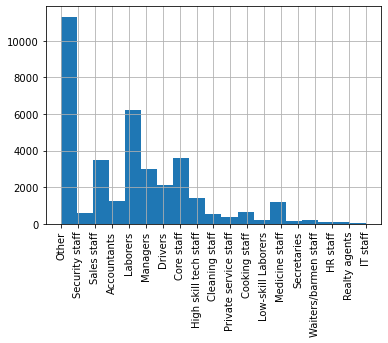

In [23]:
occupation_other = credit_card_df
occupation_other["OCCUPATION_TYPE"].fillna("Other", inplace = True)

occupation = occupation_other['OCCUPATION_TYPE']

occupation.hist(xrot=90, bins=19)

In [24]:
credit_card_df = credit_card_df.drop(['MONTHS_BALANCE'], axis=1)
credit_card_df = credit_card_df.drop(['OCCUPATION_TYPE'], axis=1)

credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,3
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,3
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,2,2
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,2
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,1


In [25]:
credit_card_df.to_csv ('cc_dataset.csv', index = False, header=True)

In [26]:
cc_outliers_df = credit_card_df[credit_card_df['AMT_INCOME_TOTAL'] < 380250] 
cc_outliers_df = credit_card_df[credit_card_df['CNT_CHILDREN'] < 2.5] 
cc_outliers_df = credit_card_df[credit_card_df['CNT_FAM_MEMBERS'] > 0.5] 
cc_outliers_df = credit_card_df[credit_card_df['CNT_FAM_MEMBERS'] < 4.5] 

cc_outliers_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,3
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,3
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,2,2
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,2
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,1


In [27]:
len_cc_outliers = len(cc_outliers_df.index)

print(len_cc_outliers)

unique_children = cc_outliers_df['CNT_CHILDREN'].unique()
print(unique_children)

unique_fam = cc_outliers_df['CNT_FAM_MEMBERS'].unique()
print(unique_fam)

35977
[0 1 2 3]
[2 1 3 4]


<AxesSubplot:>

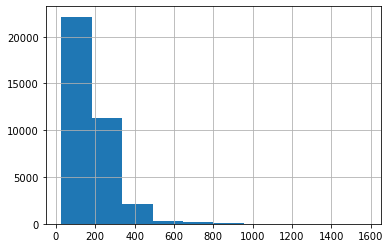

In [28]:
income_total_outliers = cc_outliers_df['AMT_INCOME_TOTAL'] / 1000   

income_total_outliers.hist(bins=10)

In [29]:
ot = pd.DataFrame(cc_outliers_df.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [30]:
num_type = pd.DataFrame(cc_outliers_df.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']

In [31]:
a = cc_outliers_df[object_type]['CODE_GENDER'].value_counts()
b = cc_outliers_df[object_type]['FLAG_OWN_CAR'].value_counts()
c = cc_outliers_df[object_type]['FLAG_OWN_REALTY'].value_counts()
d = cc_outliers_df[object_type]['NAME_INCOME_TYPE'].value_counts()
e = cc_outliers_df[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = cc_outliers_df[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = cc_outliers_df[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

F    24139
M    11838
Name: CODE_GENDER, dtype: int64 
 N    22376
Y    13601
Name: FLAG_OWN_CAR, dtype: int64 
 Y    24154
N    11823
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 18486
Commercial associate     8397
Pensioner                6141
State servant            2942
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    24421
Higher education                  9766
Incomplete higher                 1385
Lower secondary                    373
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 24600
Single / not married     4828
Civil marriage           2924
Separated                2093
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      32104
With parents            1759
Municipal apartment     1120
Rented apartment         575
Office apartment         260
Co-op apartment          159
Name: NAME_HOUSING_TYPE, dtype: int6

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cc_outliers_df:
    if cc_outliers_df[x].dtypes=='object':
        cc_outliers_df[x] = le.fit_transform(cc_outliers_df[x])

C:\Users\cravi\anaconda3\envs\file--adv_python_requirements_windows.txt\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
cc_outliers_df.to_csv ('cc_outliers_dataset.csv', index = False, header=True)

In [34]:
cc_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35977 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   35977 non-null  int64
 1   CODE_GENDER          35977 non-null  int32
 2   FLAG_OWN_CAR         35977 non-null  int32
 3   FLAG_OWN_REALTY      35977 non-null  int32
 4   CNT_CHILDREN         35977 non-null  int32
 5   AMT_INCOME_TOTAL     35977 non-null  int32
 6   NAME_INCOME_TYPE     35977 non-null  int32
 7   NAME_EDUCATION_TYPE  35977 non-null  int32
 8   NAME_FAMILY_STATUS   35977 non-null  int32
 9   NAME_HOUSING_TYPE    35977 non-null  int32
 10  DAYS_BIRTH           35977 non-null  int32
 11  DAYS_EMPLOYED        35977 non-null  int32
 12  FLAG_MOBIL           35977 non-null  int32
 13  FLAG_WORK_PHONE      35977 non-null  int32
 14  FLAG_PHONE           35977 non-null  int32
 15  FLAG_EMAIL           35977 non-null  int32
 16  CNT_FAM_MEMBERS      

In [35]:
cc_outliers_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,3
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,3
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,2
3,5008808,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,2
4,5008809,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,1


2    27342
1     4401
3     4234
Name: STATUS, dtype: int64

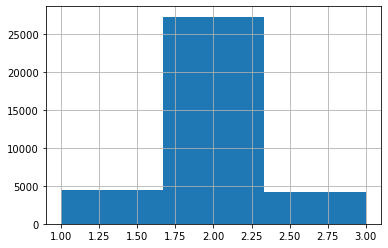

In [37]:
status_outliers = cc_outliers_df['STATUS']
status_outliers.hist(bins=3)
status_outliers.value_counts()